# Music genre classification

Author: Antonio Rodríguez Hidalgo ([CV](https://arodriguezhidalgo.github.io/CV/))

In this code we will show some strategies to classify music files using machine learning. This notebook covers the following topics:
* Feature extraction from music files.
* Classification using supervised models. Notice that no Deep Learning methodologies were proposed in this work.
* Evaluation of the performance of our models and features.

The dataset that was used is GTZAN Genre Collection, which can be found in the following link:
http://marsyas.info/downloads/datasets.html


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa, librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random, warnings, os
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
from IPython.display import clear_output
import IPython.display as ipd

warnings.filterwarnings("ignore")
%matplotlib inline


# Local dataset

In [2]:
filelist = [];
y_text = [];
y = [];

'''
We read the file that contains all the audio file names and their corresponding labels.
These are stored in the variable 'lines'.
'''
filen= os.path.join('./input/gtzan-genre-collection/genres/input.txt');
with open(filen, 'r') as f:
    lines = f.read().split('\n')

    
for line in lines[:-1]:
    '''
    We replace some of the info into each line (paths) and split them into (paths, labels),
    which we defined to be line_x and line_y respectively.
    '''    
    line = line.replace('/Users/sness/mirex2008', './input/gtzan-genre-collection').replace('.wav','.au').split('	')
    line_x = line[0];
    line_y = line[1];
    
    '''
    The variable 'filelist' will contain the paths of all the audio files, whereas 'y_text'
    will contain the label for each file. Both of them are python lists.    
    '''
    filelist.append(line_x);
    y_text.append(line_y.replace('\n',''));
   

# Encoding the labels

In [3]:
'''
We do not need one-hot encoding (in that case, we could use an Identity matrix). Instead,
we create a dictionary called 'y_labels' that will assign a number from [1,10] for each
of the music genres available in the dataset.
'''
y_labels = {}
for i,j in enumerate(set(y_text)):
    y_labels[j] = i;
    

'''
Using the dictionary 'y_labels' defined above, we encode labels for each audio file.
'''
for i in range(len(y_text)):
    y.append(y_labels[y_text[i]])

y = np.asarray(y);
clear_output()


The example below shows the effect of the coding dictionary that we are using. Variable 'ind_audio_example' is used to select one of the audio files available in the dataset. First, we check the dictionary that we generated before. In the second example, the original label of the dataset is printed, whereas in the third line of example we show the numeric label obtained after encoding using the dictionary.

In [4]:
ind_audio_example = 100;
print('\n**********************************')
print('Dictionary of labels:')
print(y_labels)

print('\n**********************************')
print('Original label: {}'.format(y_text[ind_audio_example]))

print('\n**********************************')
print('Encoded label: {}'.format(y_labels[y_text[ind_audio_example]]))



**********************************
Dictionary of labels:
{'disco': 0, 'metal': 1, 'reggae': 2, 'classical': 3, 'jazz': 4, 'hiphop': 5, 'rock': 6, 'blues': 7, 'country': 8, 'pop': 9}

**********************************
Original label: classical

**********************************
Encoded label: 3


# Showing the content of an audio file
The following block shows how to read one of the audio files of the dataset from the list we generated before. 

It also depicts how we can listen to the content of such audio file using IPython, as well as how the signal can be plotted as a graph.

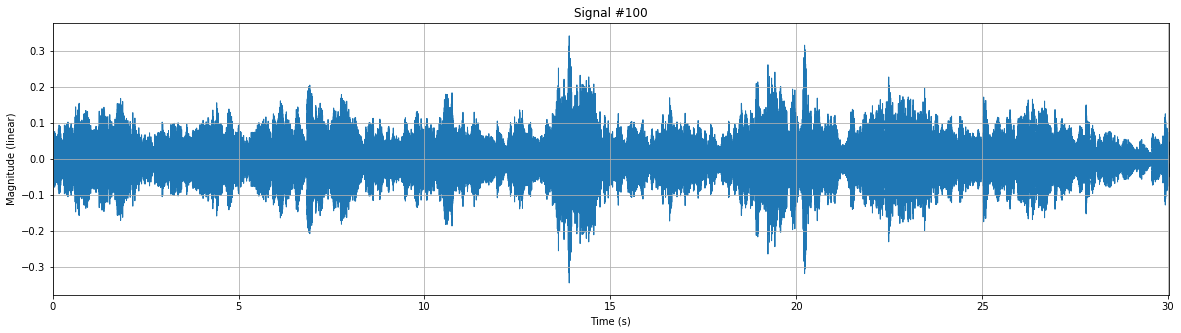

In [5]:
'''
Read the audio file from the list we generated before. Notice that the function load
returns a vector 'x' containing the audio signal as well as 'sr', which contains the 
sampling frequency.
'''
ind_audio_example = 100;
x, sr = librosa.load(filelist[ind_audio_example]);


'''
The following lines generate a figure, and use librosa to represent the audio file
in a graph.
'''
plt.figure(figsize=(20,5))
librosa.display.waveplot(x, sr = sr)
plt.grid()
plt.xlabel('Time (s)');
plt.ylabel('Magnitude (linear)');
plt.title('Signal #{0}'.format(ind_audio_example));

# The following uses the IPython audio player to play the audio file.
ipd.Audio(x, rate = sr)

# Feature extraction using Librosa
We define the global features that will be used to extract features. This include:
* window_length: Defines the temporal window used to compute the spectrogram (STFT) and other related spectro-temporal features.
* hop: Defines the overlapping existing between consecutive temporal frames of the spectro-temporal feature.
* verbose_value: Defines if you want to plot a graph or not.
* feature_selection: Defines which features are going to be computed with the feature extractor.


In [6]:
# These must be defined by the students.
window_length =  int(200e-3*sr); # i.e.: 100ms -> 100e-3*sr
hop = int(window_length/2)
verbose_value = False;
feature_selection = ['mfcc','tempo', 'pitch', 'spectral_contrast'];


The following block of code has many empty spaces that students must fullfil in order to extract the requested auditory features. We strongly follow the guidelines from the Librosa wiki: https://librosa.github.io/librosa/tutorial.html

In [7]:
feature_extraction = {}
feature_extraction['verbose'] = verbose_value;
feature_extraction['frame_length'] = window_length;
feature_extraction['frame_hop'] = hop;
feature_extraction['features'] = feature_selection;
plt.rcParams.update({'font.size': 20})

def compute_features(x, feature_extraction):
    '''
    Here we read the parameters that were defined before by the student.
    '''
    feat_vector = {};
    features = feature_extraction['features'];
    verbose = feature_extraction['verbose'];
    frame_length = feature_extraction['frame_length'];
    frame_hop = feature_extraction['frame_hop'];
    
    # We modify the length of the audio files so their maximum length is exactly of 29 seconds.
    x = x[0:29*sr];
    
    # We compute the spectrogram
    ''' 
    *****************************************************
    TASK: 
    Compute the spectrogram using Librosa. Write it in a variable called 'X'.
    '''    
    X = librosa.stft(x, n_fft=frame_length, hop_length = frame_hop, win_length = frame_length);
    ''' 
    END OF THE TASK. 
    *****************************************************
    '''
    
    if 'spectrogram' in features:
        if verbose == True:
            ''' 
            *****************************************************
            TASK: 
            Write the code to plot the spectrogram using the librosa 
            function specshow(). Remember that the axis must be properly
            defined, as well as their labels.
            '''   
            plt.figure(figsize = (20,5))
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            ''' 
            END OF THE TASK. 
            *****************************************************
            '''
        feat_vector['spectrogram'] = X;
      

    if 'mel' in features:    
        ''' 
        *****************************************************
        TASK: 
        Compute the Mel-spectrogram (64 filters) using Librosa. Write it in
        a variable called 'feat'.
        '''    
        feat = librosa.feature.melspectrogram(S = np.abs(X**2), n_mels = 64, sr = sr);
        ''' 
        END OF THE TASK. 
        *****************************************************
        '''
        
        if verbose == True:
            ''' 
            *****************************************************
            TASK: 
            Write the code to plot the spectrogram and the Mel-spectrogram using
            the librosa function specshow() and pyplot subplots. Remember that
            axes must be properly defined, as well as their labels.
            '''  
            plt.figure(figsize = (20, 10));
            plt.subplot(2,1,1);
            # For the spectrogram, we recommend to use the code implemented before.
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.subplot(2,1,2);
            # Here, we plot the Mel-spectrogram.
            librosa.display.specshow(librosa.amplitude_to_db(feat), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'mel');
            plt.title('Mel-spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.tight_layout()
            ''' 
            END OF THE TASK. 
            *****************************************************
            '''
            
        feat_vector['mel'] = np.log(feat+1e-5);

        
    if 'chroma_stft' in features:
        ''' 
        *****************************************************
        TASK: 
        Compute the Chromagram (STFT) using Librosa. Write it in a variable called
        'feat'.
        '''  
        feat = librosa.feature.chroma_stft(S = np.abs(X), sr= sr);
        ''' 
        END OF THE TASK. 
        *****************************************************
        '''        
        
        if verbose == True:
            ''' 
            *****************************************************
            TASK: 
            Write the code to plot the spectrogram and the Mel-spectrogram using
            the librosa function specshow() and pyplot subplots. Remember that
            axes must be properly defined, as well as their labels.
            '''  
            plt.figure(figsize = (20, 10));
            plt.subplot(2,1,1);
            # For the spectrogram, we recommend to use the code implemented before.
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.subplot(2,1,2)
            # Here, we plot the Chromagram.
            librosa.display.specshow(librosa.amplitude_to_db(feat), sr = sr, hop_length = frame_hop, x_axis = 'time', y_axis = 'chroma')
            plt.title('Chromagram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.tight_layout()
            ''' 
            END OF THE TASK. 
            *****************************************************
            '''  
            
        feat_vector['chroma_stft'] = feat;

        
    if 'mfcc' in features:
        ''' 
        *****************************************************
        TASK: 
        Compute the MFCC (13 components) using Librosa. Write them in a 
        variable called 'feat'.
        '''  
        feat = librosa.feature.mfcc(x, sr = sr, n_mfcc = 13, dct_type = 2, n_fft = frame_length, hop_length = frame_hop);
        ''' 
        END OF THE TASK. 
        *****************************************************
        '''  
        
        if verbose == True:
            ''' 
            *****************************************************
            TASK: 
            Write the code to plot the spectrogram and the MFCC using
            the librosa function specshow() and pyplot subplots. Remember that
            axes must be properly defined, as well as their labels.
            '''  
            plt.figure(figsize = (20, 10));
            plt.subplot(2,1,1);
            # For the spectrogram, we recommend to use the code implemented before.
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.subplot(2,1,2)
            # Here we plot the MFCC.
            librosa.display.specshow(librosa.amplitude_to_db(feat),sr = sr, hop_length = frame_hop, x_axis  = 'time');
            plt.title('MFCC #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.ylabel('Coefficient')
            plt.tight_layout()
            ''' 
            END OF THE TASK. 
            *****************************************************
            '''  
            
        '''
        The following lines MUST NOT be edited. What they do is scaling the input
        feature, since it might occur that its values have a dynamic range excesivelly
        different from the rest of the features. In order to solve such issue, we 
        define a scaler for the first processed audio file that will estimate its average
        adn standard deviation (stdev). Then, every sample (audio file) from the dataset will 
        be mean subtracted and divided by its stdev.
        '''
        if 'scaler_mfcc' in feature_extraction.keys():
            scaler = feature_extraction['scaler_mfcc'];
            feat = scaler.transform(feat.T);
        else:
            print('Creating new scaler', feat.shape)
            scaler = StandardScaler();
            feat = scaler.fit_transform(feat.T);
            feature_extraction['scaler_mfcc'] = scaler;
        feat_vector['mfcc'] = rectangle_feature(feat);
    


    if 'pitch' in features:
        ''' 
        *****************************************************
        TASK: 
        Compute the pitch for each temporal frame of the spectrogram (abs) using Librosa. 
        We recommend using the function piptrack, which will return a set of frequency
        values (pitches) as well as their weights for each frame.
        Write the outcome of such function into the variables 'pitches' and 'magnitudes'.
        '''  
        pitches, magnitudes = librosa.piptrack(S = np.abs(X), sr = sr);
        ''' 
        END OF THE TASK. 
        *****************************************************
        '''  
        
        '''
        Using the outcome of the previous function we get what frequencies are actually
        relevant, since some of them will be nulled. Then, we get their weight respecting
        each other considering their total sum. This would explain which frequency band
        is more relevant for the whole duration of the spectrogram.
        '''
        temp = (pitches*magnitudes)!=0;
        pitch_hist = np.sum(temp, axis = 1)/np.sum(temp);       
        
        feat_vector['pitch'] = pitch_hist;
    
    if 'tempo' in features: 
        ''' 
        *****************************************************
        TASK: 
        Compute the tempo using Librosa.
        Write the outcome of such function into the variables 'pitches' and 'magnitudes'.
        '''  
        tempo = librosa.beat.tempo(x, sr=sr);
        ''' 
        END OF THE TASK. 
        *****************************************************
        '''  
        if verbose == True:            
            plt.figure(figsize = (20, 10));
            T = len(x)/float(sr)
            seconds_per_beat = 60.0/tempo[0]
            beat_times = np.arange(0, T, seconds_per_beat)
            plt.figure(figsize = (20,5))
            librosa.display.waveplot(x)
            plt.vlines(beat_times, -1, 1, color='r')
            plt.title('Tempo #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
        
        '''
        We normalize the tempo to be in beats per second so its values are within 
        a reasonable range (bigger than 0, but not much bigger than 1). We also
        compute the tempo/sr and the beat frequency.        
        '''
        tempo /= 60.0; #  bits per second
        out = np.zeros(shape=(3,));
        out[0] = tempo;
        out[1] = tempo/sr; # 
        out[2] = 1/tempo; # Beat frequency.
        feat_vector['tempo'] = out;

        
    if 'spectral_contrast' in features:
        ''' 
        *****************************************************
        TASK: 
        Compute the spectral contrast from the spectrogram (abs) using Librosa.
        Write the outcome of such function into the variable 'feat'.
        '''  
        feat = librosa.feature.spectral_contrast(S =  np.abs(X), sr = sr);
        ''' 
        END OF THE TASK. 
        *****************************************************
        ''' 
        
        if verbose == True:
            ''' 
            *****************************************************
            TASK: 
            Write the code to plot the spectrogram and the spectral contrast using
            the librosa function specshow() and pyplot subplots. Remember that
            axes must be properly defined, as well as their labels.
            '''  
            plt.figure(figsize = (20, 10));
            plt.subplot(2,1,1);
            # For the spectrogram, we recommend to use the code implemented before.
            librosa.display.specshow(librosa.amplitude_to_db(X), sr = sr, hop_length = frame_hop, x_axis = 'time',y_axis = 'linear');
            plt.title('Spectrogram #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.subplot(2,1,2)
            # Here we plot the spectral contrast.
            librosa.display.specshow((feat),sr = sr, hop_length = frame_hop, x_axis  = 'time');
            plt.title('Spectral contrast #{0}'.format(ind_audio_example));
            plt.xlabel('Time (s)');
            plt.ylabel('Frecuency bands')
            plt.tight_layout()    
            ''' 
            END OF THE TASK. 
            *****************************************************
            '''  
            
        '''
        We scale data as we did previously for the MFCC.
        '''
        if 'scaler_spectral_contrast' in feature_extraction.keys():
            scaler = feature_extraction['scaler_spectral_contrast'];
            feat = scaler.transform(feat.T);
        else:
            print('Creating new scaler', feat.shape)
            scaler = StandardScaler();
            feat = scaler.fit_transform(feat.T);
            feature_extraction['scaler_spectral_contrast'] = scaler;
        feat_vector['spectral_contrast'] = rectangle_feature(feat);

        
    return feat_vector


# Auxiliary functions to perform feature extraction
The following functions are already completed, so the student only needs to understand the tasks that they are useful for.

In [8]:
def concatenate_features(x_feat_structure, feature_extraction):
    '''
    This function is in charge of concatenating a set of features that are pre-
    computed and listed in 'x_feat_structure' with their corresponding names.
    It returns a single column that contains all the features.
    '''
    x_feat_matrix = [];
    for i in feature_extraction['features']:
        x_feat_matrix.append(x_feat_structure[i]);
    return np.hstack(x_feat_matrix)


def load_signal(filename, feature_extraction):
    '''
    Function that reads an audio file 'filename' and extracts the features 
    according to the dictionary 'feature_extraction'. It returns the concatenated 
    features, producing a single vector for each audio file.
    '''
    audio = librosa.load(filename)[0];
    feat_dict = compute_features(audio, feature_extraction);

    return feat_dict

def rectangle_feature(feature):
    '''
    Function designed to compute the average and the std from the input feature. 
    It is computed along the temporal frequency, so only 'frequency' stats are
    obtained.
    '''
    feature_out = [];
    feature_out.append(np.mean(feature, axis = 0));
    feature_out.append(np.std(feature, axis = 0));
    
    return np.concatenate(feature_out,axis=0)


# Example 1
We will show how to extract features from one of the audio files. Remember that we defined previously the parameters to extract spectro-temporal features, as well as the 'features' we want to compute.

We select one of the files, i.e. #100.


**********************************
Features to compute:
['mfcc', 'tempo', 'pitch', 'spectral_contrast']

**********************************
Computing features...

Creating new scaler (13, 291)
Creating new scaler (7, 291)
{'mfcc': array([-6.55446275e-09, -6.55446275e-09,  0.00000000e+00,  0.00000000e+00,
        2.62178510e-08, -5.24357020e-08, -1.31089255e-08, -2.62178510e-08,
        0.00000000e+00,  1.31089255e-08, -2.62178510e-08,  2.62178510e-08,
        1.31089255e-08,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00], dtype=float32), 'pitch': array([0., 0., 0., ..., 0., 0., 0.]), 'tempo': array([1.95756392e+00, 8.87784091e-05, 5.10839002e-01]), 'spectral_contrast': array([ 1.22086381e-16,  6.71475094e-16,  1.80077412e-16,  6.47057818e-16,
       -1.46503657e-16, -9.27856493e-16, -1.8312957

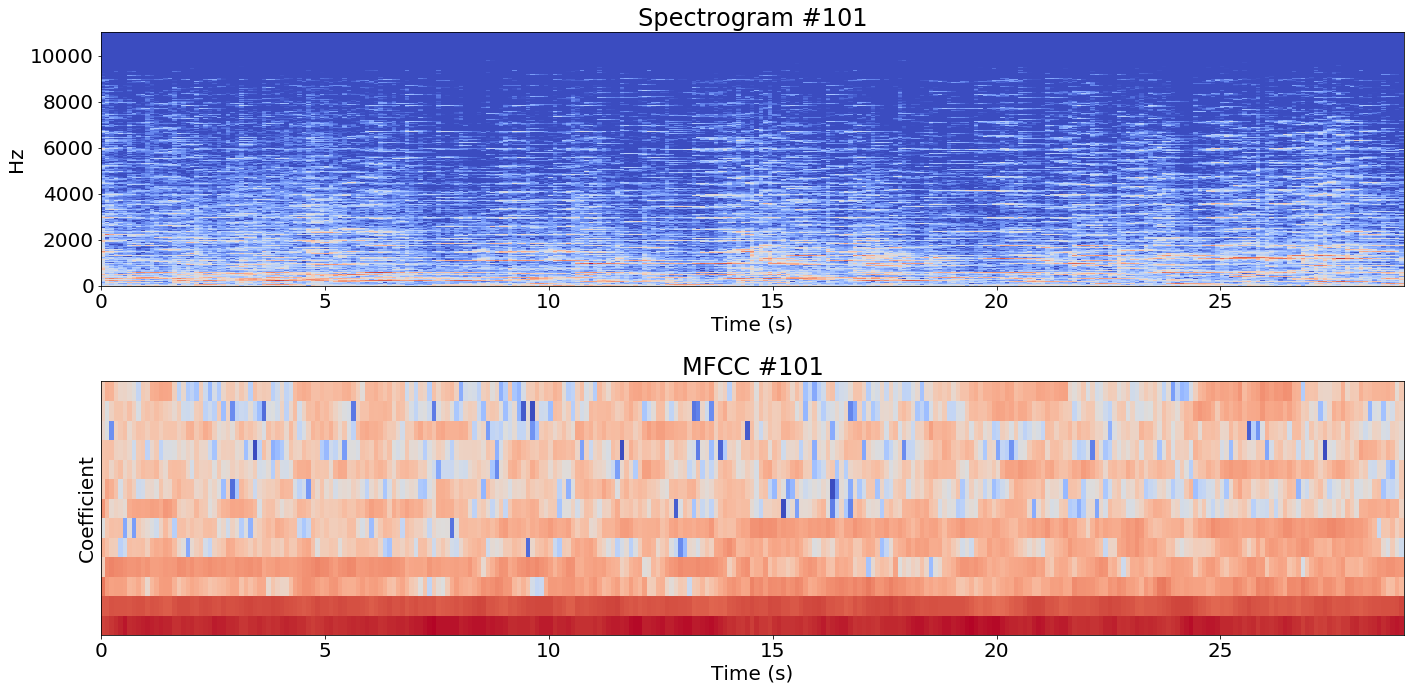

<Figure size 1440x720 with 0 Axes>

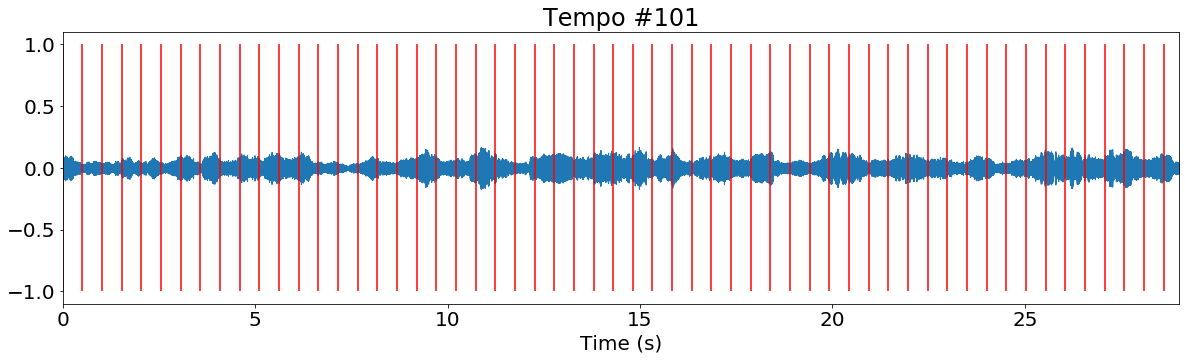

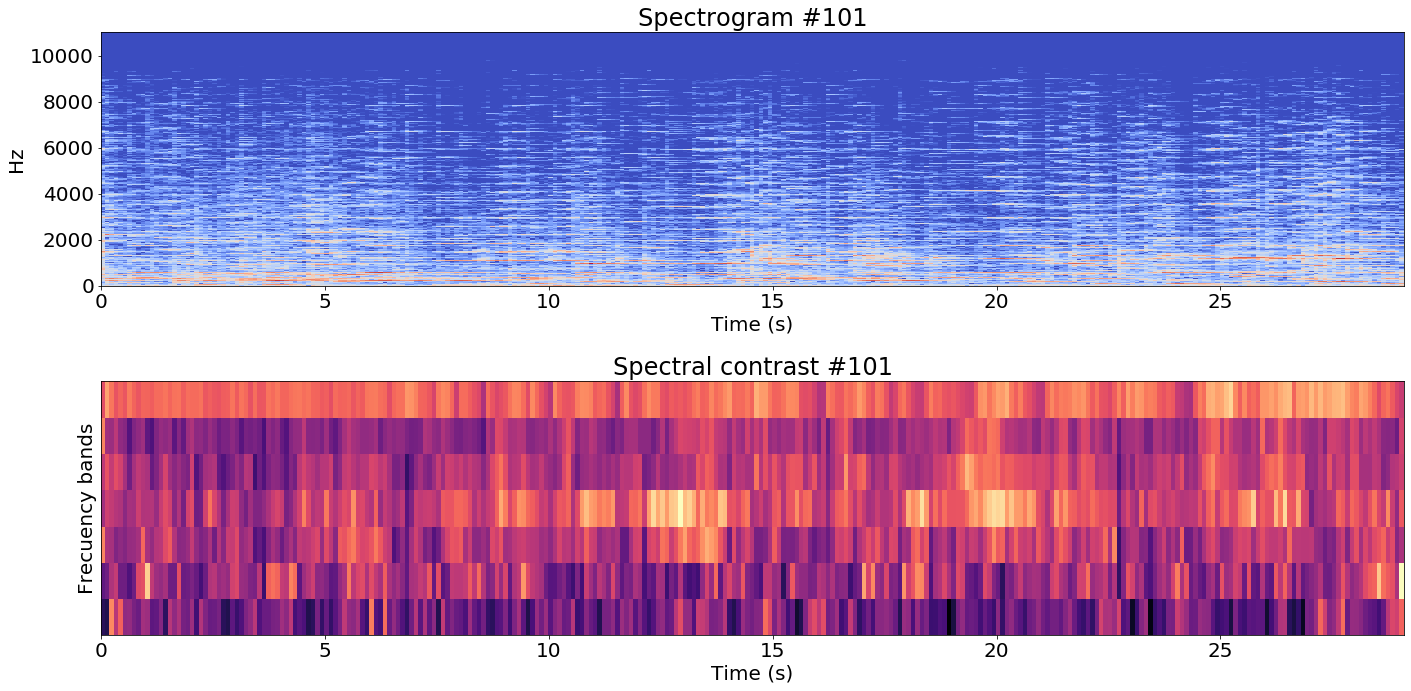

In [9]:
ind_audio_example = 101;
print('\n**********************************')
print('Features to compute:')
print(feature_extraction['features'])

print('\n**********************************')
print('Computing features...\n')
feature_extraction['verbose'] = True;
single_file_features = load_signal(filelist[ind_audio_example],feature_extraction) 
print(single_file_features)
feature_extraction['verbose'] = verbose_value;

We observe that the extracted features represent vectors of values for each feature. Remember that we computed the average and stdev for each temporal frame, which means that for spectro-temporal representations we will be keeping their average spetral information. 

It remains to concatenate the features into a single huge feature vector, which can be done using the function concatenate_features.

In [10]:
'''
We can define multiple combinations of features to extract our global feature vector.
We show two of them, which are defined in the dictionary combos with an ID and the
features that such ID is going to compute.

Notice that these IDs are customizable, so each student can name them as they wish to.
However, the item field must include what features shall be computed. In our example,
we have two combos: the first one concatenates only the MFCCs, and the second 
concatenates both tempo and spectral contrast.
'''
combos = {'mf':['mfcc'],
          'tem_fcont': ['tempo','spectral_contrast']
         }

# Example 1: MFCC
feature_extraction['features'] = combos['mf']
feat_vector = concatenate_features(single_file_features, feature_extraction)
print('\n**********************************')
print('Example 1.1.')
print('Extracted feature(s): {}'.format(feature_extraction['features']))
print('Global feature vector: {}'.format(feat_vector))

# Example 2: Tempo, spectral contrast
feature_extraction['features'] = combos['tem_fcont']
feat_vector = concatenate_features(single_file_features, feature_extraction)
print('\n**********************************')
print('Example 1.2.')
print('Extracted feature(s): {}'.format(feature_extraction['features']))
print('Global feature vector: {}'.format(feat_vector))


**********************************
Example 1.1.
Extracted feature(s): ['mfcc']
Global feature vector: [-6.55446275e-09 -6.55446275e-09  0.00000000e+00  0.00000000e+00
  2.62178510e-08 -5.24357020e-08 -1.31089255e-08 -2.62178510e-08
  0.00000000e+00  1.31089255e-08 -2.62178510e-08  2.62178510e-08
  1.31089255e-08  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00]

**********************************
Example 1.2.
Extracted feature(s): ['tempo', 'spectral_contrast']
Global feature vector: [ 1.95756392e+00  8.87784091e-05  5.10839002e-01  1.22086381e-16
  6.71475094e-16  1.80077412e-16  6.47057818e-16 -1.46503657e-16
 -9.27856493e-16 -1.83129571e-16  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00]


# Train/test subset generation
It is important to recall that features are computed first, a significant number o them, and then we select and concatenate the ones that we want to keep for our genre classification. This is a way of saving time, since features are computed only once and then we work with different subsets of these.

In the following block of code we divide our fileset into train and test, so we can use one of these groups of files only for evaluation whereas the rest are employed exclusively to fit our statistical models.

In [11]:
rand_seed = 1492; # We use a fixed seed so we always use the same files.

''' 
*****************************************************
TASK: 
Use the function from scikit-learn that divides the filelist set into two subsets,
for train and test respectively. The requirements are the following ones:
* It must split the 'filelist' and the labels 'y'. 
* Test size must be at least 20%.
* It must be stratified so the classes are balanced.
* The random seed must be the one depicted above in 'rand_seed'.
'''  
[file_train, file_test, y_train, y_test] = train_test_split(filelist, y, test_size=0.2, random_state = rand_seed, stratify = y)
''' 
END OF THE TASK. 
*****************************************************
''' 


'''
The following lines are in charge of extracting the features for each of the audio
files. Remember that we extract a huge set of features first, and then select which
ones we want to use to train a model later on. 

To see how these lines work, we recommend to read the following link:
https://www.pythonforbeginners.com/basics/list-comprehensions-in-python.
'''
feature_extraction['features'] = ['spectrogram','mel','mfcc','chroma_stft',
                                  'tempo', 'spectral_contrast','pitch'] # 
data_train = [load_signal(file_train[i],feature_extraction) for i in range(len(file_train))];
data_test = [load_signal(file_test[i],feature_extraction) for i in range(len(file_test))];


# Genre classification
So far, we have computed features from audio files and categorized them in train and test subsets. The next objective consists of training a model that is matematically capable to determine if a music file belongs to a certain genre.

The following function is in charge of creating an example model known as K-Nearest Neighbors (KNN), whose details can be found in the following link: 
* https://www.youtube.com/watch?v=k_7gMp5wh5A

The classifier function is returned in the variable clf, and the selected parameters to test for such model are stored in param_dist. The idea depicted in the example is that we generate randomly a number 'n_iter_search' of parameters, randomly, so we train several models using different configurations. This procedure is known as randomized search cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Inspired in the KNN model proposed in the example below, students must provide the model that they were assigned in class and config the random parameters to be tested.

In [12]:
def classifiers(classifier_name, seed, n_iter_search):
    random.seed(seed)
    if classifier_name == 'knn':
        from sklearn.neighbors import KNeighborsClassifier

        clf = KNeighborsClassifier();
        param_dist = {
                        'n_neighbors':  [2**random.randint(0,6) for i in range(n_iter_search)],
                        'algorithm': [random.sample(['ball_tree', 'kd_tree', 'brute'], 1)[0] for i in range(n_iter_search)],
                        'leaf_size': [2**random.randint(0,8) for i in range(n_iter_search)],
                        'p': [random.randint(1,5) for i in range(n_iter_search)]
                     }
#     if classifier_name == 'student_model':
#         ''' 
#         *****************************************************
#         TASK: 
#         Students must implement their corresponding classifier, as well as providing
#         some random values for the model parameters.
#         '''  
#         import
#         clf = 
#         param_dist = {
#                       'param1': [],     
#                       'param2': [],
#                       'param3': []
#                     }
        
#         ''' 
#         END OF THE TASK. 
#         *****************************************************
#         ''' 
        
    if classifier_name == 'SVM_linear':
        base_estim = SVC(random_state=seed, kernel = 'linear');
        clf =OneVsRestClassifier(base_estim);
        param_dist = {
              'estimator__C':[10**random.randint(-5,0) for i in range(n_iter_search)], 
              'estimator__gamma':[10**random.randint(-5,2) for i in range(n_iter_search)], 
              }
        
    if classifier_name == 'rforest':
        clf = RandomForestClassifier(random_state = seed);        
        param_dist = {
            'n_estimators':[random.randint(1,200) for i in range(n_iter_search)],  
            'max_depth':[random.randint(1,5) for i in range(n_iter_search-1)]+[None], 
            'min_samples_split':[random.randint(2,10) for i in range(n_iter_search)],
            'min_samples_leaf':[random.randint(1,5) for i in range(n_iter_search)],
            }
        
    if classifier_name == 'gboost':
        # Gradient boost
        clf = GradientBoostingClassifier(random_state=seed)
        param_dist = {
              'n_estimators':[random.randint(1,100) for i in range(n_iter_search)],  
              'max_depth':[random.randint(1,5) for i in range(n_iter_search-1)]+[None], 
              'min_samples_split':[random.randint(2,10) for i in range(n_iter_search)],
              'min_samples_leaf':[random.randint(1,5) for i in range(n_iter_search)],
              'learning_rate':[10**random.randint(-5,-1) for i in range(n_iter_search)],
              # 'subsample':[random.randint(1,4)/4 for i in range(n_iter_search)], 
              'max_features':[random.randint(1,4)/4 for i in range(n_iter_search)], 
              }

    if classifier_name == 'SVM':
        base_estim = SVC(random_state=seed);
        clf =OneVsRestClassifier(base_estim);
        param_dist = {
              'estimator__C':[10**random.randint(-5,0) for i in range(n_iter_search)], 
              'estimator__gamma':[10**random.randint(-5,2) for i in range(n_iter_search)], 
              }
        
    if classifier_name == 'logistic_regression':
        from sklearn.linear_model import LogisticRegression
        clf =LogisticRegression(solver='saga');
        param_dist = {
              'penalty':[random.sample(['l1','l2','elasticnet'],1)[0] for i in range(n_iter_search)], 
              'C':[random.random()*(10**random.randint(0,4))for i in range(n_iter_search)], 
              'l1_ratio': [random.random() for i in range(n_iter_search)]
              }
        
    if classifier_name == 'MLP':
        from sklearn.neural_network import MLPClassifier
        clf = MLPClassifier(max_iter = 5)
        param_dist = {
              'hidden_layer_sizes':[10**random.randint(1,3) for i in range(n_iter_search)], 
              'activation':[random.sample(['identity', 'logistic', 'tanh', 'relu'],1)[0] for i in range(n_iter_search)], 
              'batch_size': [2**random.randint(3,4) for i in range(n_iter_search)]
              }
        
    if classifier_name == 'adaboost':
        from sklearn.ensemble import AdaBoostClassifier
        clf = AdaBoostClassifier()
        param_dist = {
            'n_estimators':[random.randint(1,300) for i in range(n_iter_search)],  
            'learning_rate':[random.random()*(10**random.randint(-2,2)) for i in range(n_iter_search-1)]+[None], 
            }
        
    if classifier_name == 'decision_tree':
        from sklearn.tree import DecisionTreeClassifier
        clf = DecisionTreeClassifier()
        param_dist = {
            'criterion': [random.sample(['gini','entropy'],1)[0] for i in range(n_iter_search)],
            'max_depth':[random.randint(1,5) for i in range(n_iter_search-1)]+[None], 
            'min_samples_split':[random.randint(2,10) for i in range(n_iter_search)],
            'min_samples_leaf':[random.randint(1,5) for i in range(n_iter_search)],
            }
        
    if classifier_name == 'passive_aggressive':
        # Tutorial: https://www.youtube.com/watch?v=TJU8NfDdqNQ
        from sklearn.linear_model import PassiveAggressiveClassifier
        clf = PassiveAggressiveClassifier(max_iter=1000)
        param_dist = {
            'C': [10**random.randint(-2,2) for i in range(n_iter_search)],
            'loss':[random.sample(['hinge','squared_hinge'],1)[0] for i in range(n_iter_search)],
            'fit_intercept':[random.sample([True, False],1)[0] for i in range(n_iter_search)]
            }
        
    return clf, param_dist


The following lines define what features to use and what models to train. In fact, many feature combinations can be provided using different tags. The example shows the following combos:
* 'tem': Uses only the tempo (defined in the square brackets).
* 'fcont': Uses only the spectral contrast (defined in the square brackets).
* 'mfcc_tem_fcont': Uses MFCC, tempo and spectral contrast as features.
Notice that the selection of features happens in the square brackets, whereas the rest (i.e. mfcc_tem_fcont) is merely a label that can be defined as the user wants.

In [13]:
'''
We define here what features to use.
'''
combos = {
          'tem': ['tempo'],          
          'fcont': ['spectral_contrast'],
          'mfcc_tem_fcont': ['mfcc','tempo','spectral_contrast'],
          'mfcc_fcont': ['mfcc','spectral_contrast'],
          }


'''
we define here what classifiers to train, as well as the number of randomized parameters
that we want to test.
'''
clf_selection = ['knn','decision_tree','passive_aggressive']
n_iter_search = 50


scores = {};
params = {};
confusion_matrices = {};
reports = {};


'''
We train a model for each selected set of features, and test its performance using 'x_test'.
'''
for combo_i in combos.keys():
    # We select a feature-set.
    print('Processing combo: {0}'.format(combos[combo_i]))
    feature_extraction['features'] = combos[combo_i];

    # Here, we group the pre-computed features.
    x_train = [concatenate_features(i, feature_extraction) for i in data_train];
    x_test = [concatenate_features(i, feature_extraction) for i in data_test];

    # Specify the random seed.
    random.seed(rand_seed)

    # If there are more than one model, we train them independently.
    for clf_name in clf_selection:
        '''
        We get the model using its name, the random seed and the number of random 
        parameters to use. The function returns the classifier and some random
        params.
        '''
        clf, param_dist = classifiers(clf_name, rand_seed, n_iter_search)

        '''
        The following two lines are in charge of training several models testing
        all the randomized parameters that we generated.
        '''
        random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False, n_jobs = 2, scoring = 'accuracy', random_state=rand_seed, verbose = False);
        random_search.fit(x_train, y_train);    

        '''
        We keep only the best scores and setup obtained from the randomized search.
        '''
        params[clf_name+'+'+combo_i] = random_search.best_params_
        scores[clf_name+'+'+combo_i] = random_search.best_score_
        
        '''
        We predict the quality of the model using unknown data (x_test), so we can 
        verify whether the top model overfits or is properly trained.
        '''
        y_pred = random_search.best_estimator_.predict(x_test);

        '''
        We get some confusion matrices out of the test data, as well as some other scores.
        '''
        # Confusion matrix
        cm = pd.DataFrame(confusion_matrix(y_test, y_pred));
        cm.index.name = 'Actual';
        cm.columns.name = 'Predicted';
        confusion_matrices[clf_name+'+'+combo_i] = cm;

        # F-score/Accuracy report
        reports[clf_name+'+'+combo_i] = classification_report(y_test, y_pred, target_names= y_labels.keys(),output_dict=True);

print('\n**********************************')
print('All the models were trained successfully!')
print('\n**********************************')

Processing combo: ['tempo']
Processing combo: ['spectral_contrast']
Processing combo: ['mfcc', 'tempo', 'spectral_contrast']
Processing combo: ['mfcc', 'spectral_contrast']

**********************************
All the models were trained successfully!

**********************************


# Scores
In the following section we will check out the performance of the trained classifiers as well as the influence of our features. We show Accuracy, Precission, Recall and the F1-score (See https://en.wikipedia.org/wiki/F1_score).

In [14]:
counter = 0
subcounter = 0;
headers = [];
table_list = [];
for i in reports.keys():      
    table = pd.DataFrame.from_dict({
        'Accuracy':reports[i]['accuracy'],
        'Precision': reports[i]['macro avg']['precision'],
        'Recall': reports[i]['macro avg']['recall'],
        'F1-score': reports[i]['macro avg']['f1-score'],
    }, orient = 'index', columns =  [i.split('+')[0]]);
    
    if subcounter == 0:
        table_list = table;
    else:
        table_list = table_list.join(table)
    subcounter += 1;

    if subcounter == len(clf_selection):
        print('****************************************')
        print('Features: {0}\n'.format(list(combos.values())[counter]))
        print(table_list)
        print('\n')
        subcounter = 0;
        counter+=1;


****************************************
Features: ['tempo']

                knn  decision_tree  passive_aggressive
Accuracy   0.190000       0.195000            0.145000
Precision  0.104078       0.109212            0.039249
Recall     0.190000       0.195000            0.145000
F1-score   0.125104       0.131758            0.055353


****************************************
Features: ['spectral_contrast']

                knn  decision_tree  passive_aggressive
Accuracy   0.500000       0.415000            0.375000
Precision  0.503233       0.408618            0.326991
Recall     0.500000       0.415000            0.375000
F1-score   0.499534       0.403077            0.309349


****************************************
Features: ['mfcc', 'tempo', 'spectral_contrast']

                knn  decision_tree  passive_aggressive
Accuracy   0.705000       0.530000            0.470000
Precision  0.708453       0.563058            0.612822
Recall     0.705000       0.530000            0.470000

# Confusion matrices
In the following section, we show the confusion matrices for each classifier/feature combination. Notice that this is a quite useful tool, since it allows to analyze how different classes are confused with different ones by the algorithms.

In [15]:
def plot_confusion_matrix(data_cm, data_labels):
    ''' 
    Function designed to plot a confusion matrix using seaborn. The inputs are
    the confusion matrix as a pandas Dataframe and a dictionary with the labels.
    '''
    ax = sn.heatmap(data_cm, yticklabels=data_labels.keys(), annot = True);
    ax.set_ylim(10, 0)
    ax.set_xticklabels(data_labels.keys(),rotation=45, horizontalalignment='right');


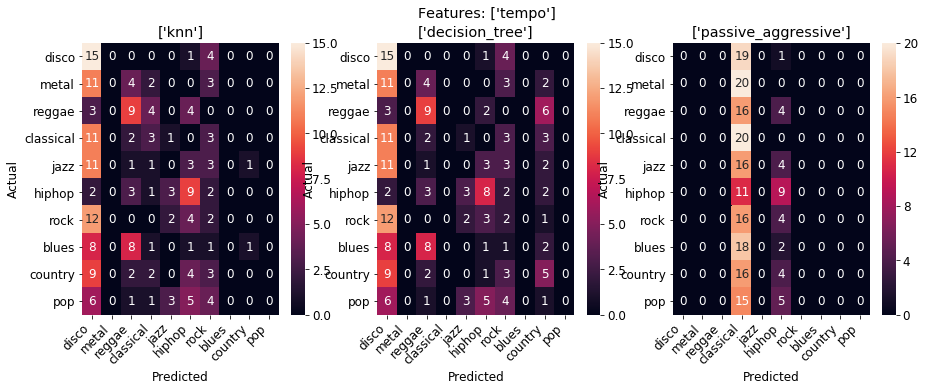

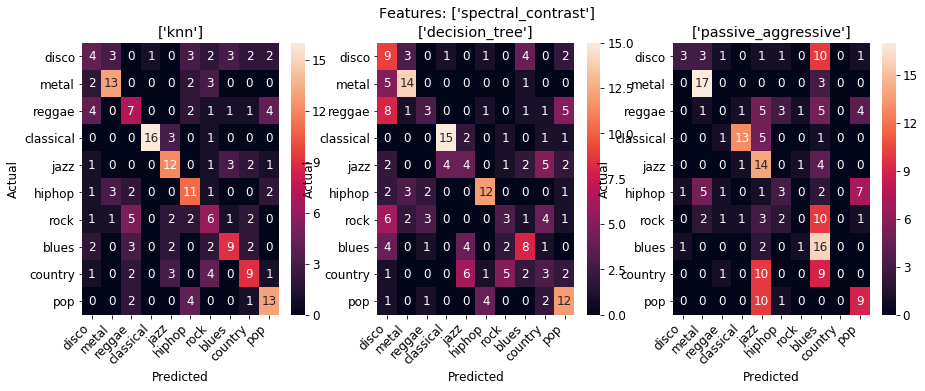

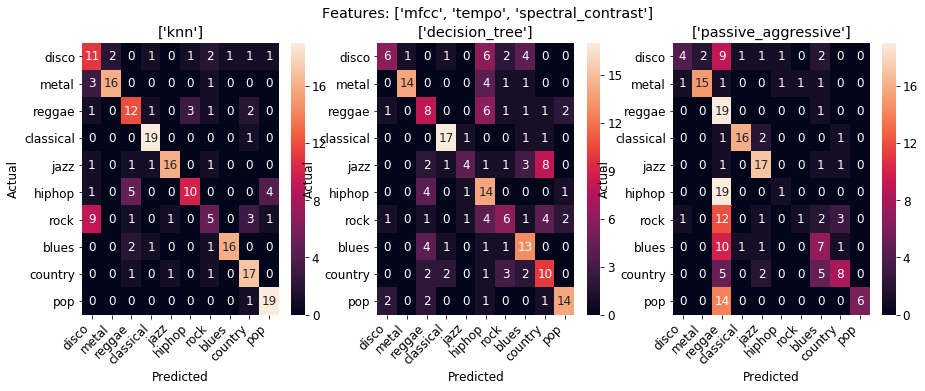

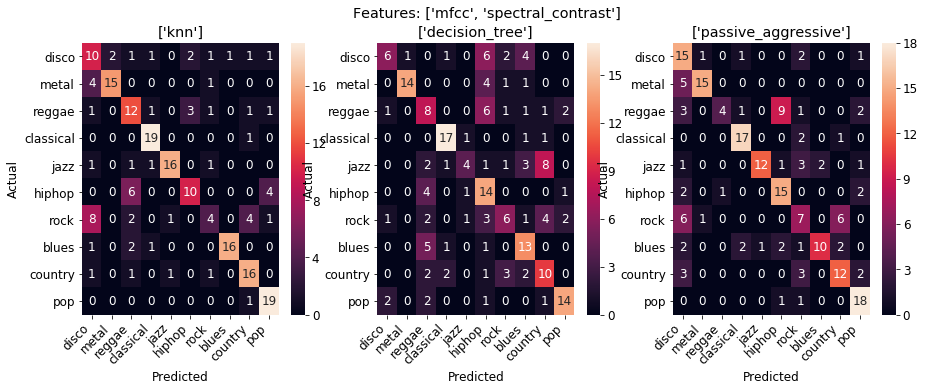

In [16]:
counter = 0
subcounter = 0;
headers = [];
table_list = [];
plt.rcParams.update({'font.size': 12})
for i in reports.keys():      
    table = pd.DataFrame.from_dict({
        'Accuracy':reports[i]['accuracy'],
        'Precision': reports[i]['macro avg']['precision'],
        'Recall': reports[i]['macro avg']['recall'],
        'F1-score': reports[i]['macro avg']['f1-score'],
    }, orient = 'index', columns =  [i.split('+')[0]]);
    if subcounter == 0:
        plt.figure(figsize=(15,5));
        plt.suptitle('Features: {0}\n'.format(list(combos.values())[counter]))
  
    plt.subplot(1,len(clf_selection),subcounter+1)
    plt.title([i.split('+')[0]])
    plot_confusion_matrix(confusion_matrices[i], y_labels)
    subcounter += 1;
    if subcounter ==  len(clf_selection):
        subcounter = 0;
        counter+=1;